# 4.1 KNN（分类算法）基础

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 实验数据：

In [3]:
#X轴原始数据
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]
#Y轴原始数据
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

## 数据可视化：

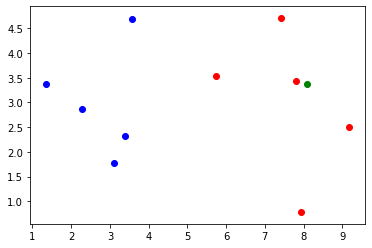

In [4]:
x_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color="blue")
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color="red")
x = np.array([8.093607318, 3.365731514])
plt.scatter(x[0],x[1],color="green")

## KNN思想介绍：
- 使用KNN算法来进行x点的预测：

 思想：对于要预测的值，计算样本空间中所有样本与它的距离，按照从小到大的顺序对计算的距离值进行排序，
 在这些距离值中，选取最小的K个元素，根据这K个元素所处类别的多数类，来判断当前要预测的值所处的类别。

## KNN简易实现代码与流程：
1. 计算样本空间中所有样本点与预测点的欧拉距离

In [5]:
distance=[]
for one_train in x_train:
    distance.append(np.sqrt(np.sum((one_train-x)**2)))

In [6]:
distance

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

2. 按照距离值进行排序

In [7]:
nearest = np.argsort(distance)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

3. 根据排序的结果选取K个元素

In [8]:
k = 6
tok_k_y = [y_train[neighbour] for neighbour in nearest[:k]]
tok_k_y

[1, 1, 1, 1, 1, 0]

4. 根据这k个元素进行投票

In [9]:
from collections import Counter
votes = Counter(tok_k_y)

5. 得出预测值

In [16]:
predict = votes.most_common(1)[0][0]
print("预测的值为：",predict)

预测的值为： 1


## 使用scikit-learn的KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Clasify = KNeighborsClassifier(6)
KNN_Clasify.fit(x_train,y_train)
KNN_Clasify.predict(x.reshape(1,-1))

array([1])